In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge
# evaluate knn on the sonar dataset with k-means ordinal discretization transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold
import time
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2

In [2]:
#heart = pd.read_csv('dataset/heart.csv')
heart = pd.read_csv('dataset/heart_failure_clinical_records_dataset.csv')
#saturation = pd.read_csv ('dataset/o2Saturation.csv')

In [3]:
heart.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### data description
- age - Age of the patient
- sex - Sex of the patient
- cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- trtbps - Resting blood pressure (in mm Hg)
- chol - Cholestoral in mg/dl fetched via BMI sensor
- fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- thalachh - Maximum heart rate achieved
- oldpeak - Previous peak
- slp - Slope
- caa - Number of major vessels
- thall - Thalium Stress Test result ~ (0,3)
- exng - Exercise induced angina ~ 1 = Yes, 0 = No
- output - target : 0= less chance of heart attack 1= more chance of heart attack

In [5]:
heart.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### data Preprocessing 

In [6]:
dataset = heart
dataset.drop_duplicates(inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [7]:
dataset = pd.get_dummies(dataset ,drop_first=True)


In [8]:
#Standerdize
def standardise(X):
    scaler = StandardScaler()
    scaler.fit(X)
    scaled_features = scaler.transform(X) # centering and scaling
    return(scaled_features)

In [9]:
# finding optimal value of k
def hyper_tune(X,y):
    #Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=101
                                                   )
    
    error_rate = []
    for i in range(1,40):

         knn = KNeighborsClassifier(n_neighbors=i)
         knn.fit(X_train,y_train)
         pred_i = knn.predict(X_test)
         error_rate.append(np.mean(pred_i != y_test))

    plt.figure(figsize=(10,6))
    plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
             marker='o',markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)) + 1)
    return(error_rate.index(min(error_rate)) + 1)


## Train the KNN Classifier

In [10]:
def calculate_model(k,X,y):
    
    recall_list_10 = []
    precision_list_10 = []
    specificity_10 = []
    f1_list_10 = []
    accuracy_10 = []
    cpu_10 = []
    roc_10 = []

    kfold = KFold(n_splits=10, shuffle=True)
    for i in range(30):
        recall_list = []
        precision_list = []
        specificity = []
        f1_list = []
        accuracy = []
        cpu = []
        roc_list = []
        



        for train_ix, test_ix in kfold.split(X, y):




            X_train , X_test = X[train_ix],X[test_ix]
            y_train , y_test = y[train_ix] , y[test_ix]
            t0= time.time()
            model = KNeighborsClassifier(n_neighbors = k)

            model.fit(X_train,y_train)
            predictions = model.predict(X_test)
            probs = model.predict_proba(X_test)
            probs = probs[:, 1]
            t1 = time.time() - t0
                        #print("Time elapsed: ", t1) # CPU seconds elapsed (floating point)
            cm = confusion_matrix(y_test,predictions)
            f1_list.append(f1_score(y_test, predictions, average="weighted")*100)

            recall_list.append(recall_score(y_test, predictions, average="weighted")*100)
            precision_list.append(precision_score(y_test, predictions, average="weighted")*100)
            specificity1 = cm[1,1]/(cm[0,1]+cm[1,1])
            if not np.isnan(specificity1):
                specificity.append( (cm[1,1]/(cm[0,1]+cm[1,1]))*100)
            accuracy.append(accuracy_score(y_test, predictions)*100)
            roc_list.append(roc_auc_score(y_test, probs)*100)
            cpu.append(t1)

        precision_list_10.append(sum(precision_list)/10)
        specificity_10.append(sum(specificity)/len(specificity))
        f1_list_10.append(sum(f1_list)/10)
        accuracy_10.append(sum(accuracy)/10)
        recall_list_10.append(sum(recall_list)/10)
        roc_10.append(sum(roc_list)/10)
        cpu_10.append(sum(cpu)/10)



        #print(accuracy_10)
        #print(precision_list_10)
        #print(recall_list_10)\

        #print(f1_list_10)
        #print(specificity_10)




   
    accu = sum(accuracy_10)/30
    pre = sum(precision_list_10)/30
    spec = sum(specificity_10)/30
    rec =  sum(recall_list_10)/30
    f1 =  sum(f1_list_10)/30
    roc = sum(roc_10)/30
    cpu = sum(cpu_10)/30
    return([accu,pre,spec,rec,f1,roc,cpu])



In [11]:
dict_knn = {}

## Std model 

In [12]:

X = dataset.iloc[:, 0:-1]
#X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1]
scaled_features = standardise(X)

k= 5
X=scaled_features
result = calculate_model(k,X,y)
dict_knn['Std_scalar'] = result
dict_knn



{'Std_scalar': [73.97931034482758,
  74.44135107416903,
  67.846164021164,
  73.97931034482758,
  71.19334828711136,
  75.4014396411566,
  0.002238281567891439]}

## Std Scalar + optimal value model

Minimum error:- 0.16666666666666666 at K = 21


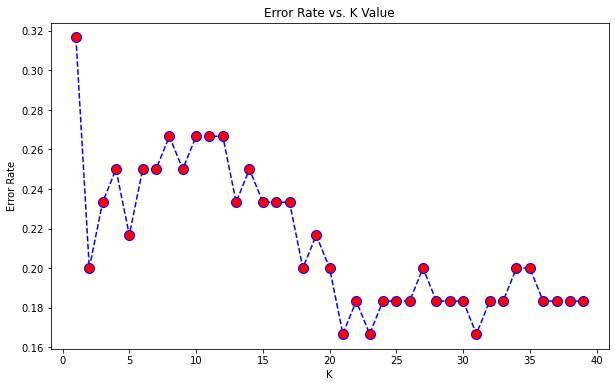

In [13]:
X = dataset.iloc[:, 0:-1]
#X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1]
scaled_features = standardise(X)
X= scaled_features
k= hyper_tune(X,y)

result = calculate_model(k,X,y)
dict_knn['Optimal_k'] = result



In [14]:
dict_knn

{'Std_scalar': [73.97931034482758,
  74.44135107416903,
  67.846164021164,
  73.97931034482758,
  71.19334828711136,
  75.4014396411566,
  0.002238281567891439],
 'Optimal_k': [72.88467432950192,
  74.97114124376724,
  82.8157848324515,
  72.88467432950192,
  66.41798996673131,
  83.04581165765065,
  0.0025583585103352863]}

## Sequential Forward Search/Backward search


Sequential Forward Selection :
(0, 3, 4, 5, 11)
CV Score:
0.7909574468085105
[0, 3, 4, 5, 11]
Minimum error:- 0.15 at K = 2


[77.21455938697316,
 78.6648531063861,
 79.06459435626103,
 77.21455938697316,
 74.49233655494221,
 77.50745017536009,
 0.0014775180816650395]

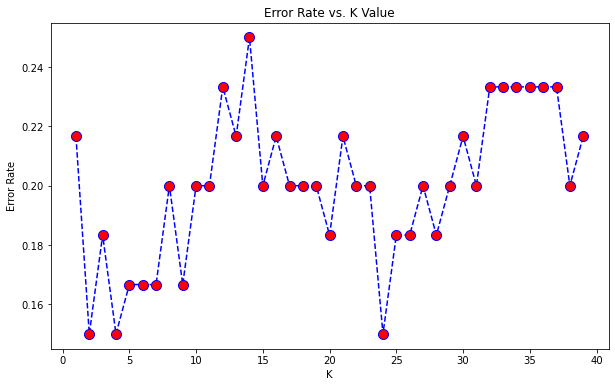

In [15]:
X = dataset.iloc[:, 0:-1].values
#X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1]
scaled_features = standardise(X)
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.2, random_state=101
                                                   )
# Sequential Forward Selection
knn = KNeighborsClassifier()
sfs = SFS(knn, 
          k_features= 5, 
          forward=True, 
          floating=False, 
          scoring='accuracy',

          n_jobs=-1)
sfs = sfs.fit(X_train, y_train)

print('\nSequential Forward Selection :')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)
#X_train = X_train[:, feat_cols]
#X_test = X_test[:, feat_cols]

X= standardise(X)
X = X[:,feat_cols]
k= hyper_tune(X,y)

result = calculate_model(k,X,y)
dict_knn['SFS'] = result
result


Sequential Forward Selection :
(0, 2, 4, 5, 8, 9, 10, 11)
CV Score:
0.7823581560283687
[0, 2, 4, 5, 8, 9, 10, 11]
Minimum error:- 0.15 at K = 13


[78.15593869731802,
 80.17526315027085,
 82.52656325156327,
 78.15593869731802,
 75.43245380133747,
 79.94592553958955,
 0.0021536684036254877]

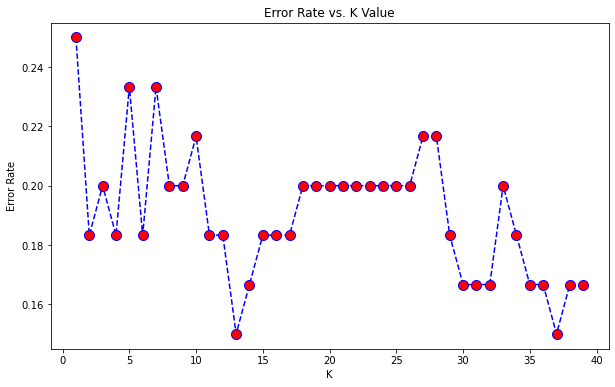

In [16]:
X = dataset.iloc[:, 0:-1].values
#X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1]
scaled_features = standardise(X)
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.2, random_state=101
                                                   )
# Sequential Forward Selection
knn = KNeighborsClassifier()
sfs = SFS(knn, 
          k_features= 8, 
          forward=False, 
          floating=False, 
          scoring='accuracy',

          n_jobs=-1)
sfs = sfs.fit(X_train, y_train)

print('\nSequential Forward Selection :')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)
#X_train = X_train[:, feat_cols]
#X_test = X_test[:, feat_cols]

X= standardise(X)
X = X[:,feat_cols]
k= hyper_tune(X,y)

result = calculate_model(k,X,y)
dict_knn['SBS'] = result
result

In [17]:
dict_knn

{'Std_scalar': [73.97931034482758,
  74.44135107416903,
  67.846164021164,
  73.97931034482758,
  71.19334828711136,
  75.4014396411566,
  0.002238281567891439],
 'Optimal_k': [72.88467432950192,
  74.97114124376724,
  82.8157848324515,
  72.88467432950192,
  66.41798996673131,
  83.04581165765065,
  0.0025583585103352863],
 'SFS': [77.21455938697316,
  78.6648531063861,
  79.06459435626103,
  77.21455938697316,
  74.49233655494221,
  77.50745017536009,
  0.0014775180816650395],
 'SBS': [78.15593869731802,
  80.17526315027085,
  82.52656325156327,
  78.15593869731802,
  75.43245380133747,
  79.94592553958955,
  0.0021536684036254877]}

## Mutual info

In [18]:
X = dataset.iloc[:, 0:-1]
#X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1]
scaled_features = standardise(X)
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.2, random_state=101
                                                   )
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

time                        0.247969
ejection_fraction           0.103689
serum_creatinine            0.075851
age                         0.064554
serum_sodium                0.020425
diabetes                    0.006583
sex                         0.004348
creatinine_phosphokinase    0.002542
smoking                     0.000000
platelets                   0.000000
high_blood_pressure         0.000000
anaemia                     0.000000
dtype: float64

Minimum error:- 0.13333333333333333 at K = 9


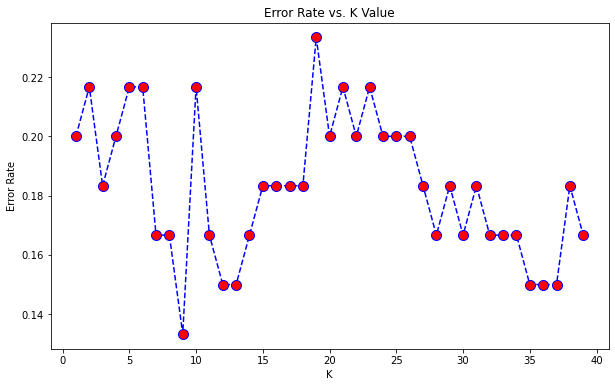

In [19]:

#Mutual Inormation
#'time','ejection_fraction','serum_creatinine','age','smoking','serum_sodium','creatinine_phosphokinase'
X = dataset [['time','ejection_fraction','serum_creatinine','age','smoking','serum_sodium','anaemia','creatinine_phosphokinase','diabetes']].values
y = dataset.iloc[:, -1].values
X= standardise(X)

k= hyper_tune(X,y)

result = calculate_model(k,X,y)
dict_knn['MI'] = result



In [20]:
dict_knn

{'Std_scalar': [73.97931034482758,
  74.44135107416903,
  67.846164021164,
  73.97931034482758,
  71.19334828711136,
  75.4014396411566,
  0.002238281567891439],
 'Optimal_k': [72.88467432950192,
  74.97114124376724,
  82.8157848324515,
  72.88467432950192,
  66.41798996673131,
  83.04581165765065,
  0.0025583585103352863],
 'SFS': [77.21455938697316,
  78.6648531063861,
  79.06459435626103,
  77.21455938697316,
  74.49233655494221,
  77.50745017536009,
  0.0014775180816650395],
 'SBS': [78.15593869731802,
  80.17526315027085,
  82.52656325156327,
  78.15593869731802,
  75.43245380133747,
  79.94592553958955,
  0.0021536684036254877],
 'MI': [75.84444444444443,
  76.85939268792104,
  72.81227753727754,
  75.84444444444443,
  73.41944022566011,
  80.31032430630698,
  0.002186671098073323]}

## Chi square 

In [21]:
from sklearn.feature_selection import chi2
X = dataset.iloc[:, 0:-1]
#X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=101
                                                   )


f_p_values=chi2(X_train,y_train)
f_p_values
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X.columns
p_values

p_values.sort_values(ascending=True)

creatinine_phosphokinase    0.000000e+00
time                        0.000000e+00
platelets                   1.094471e-95
ejection_fraction           2.392247e-17
age                         4.468224e-12
serum_creatinine            1.918267e-04
high_blood_pressure         2.688559e-01
serum_sodium                4.259645e-01
anaemia                     5.603832e-01
smoking                     9.571707e-01
diabetes                    9.614165e-01
sex                         9.698977e-01
dtype: float64

Minimum error:- 0.16666666666666666 at K = 5


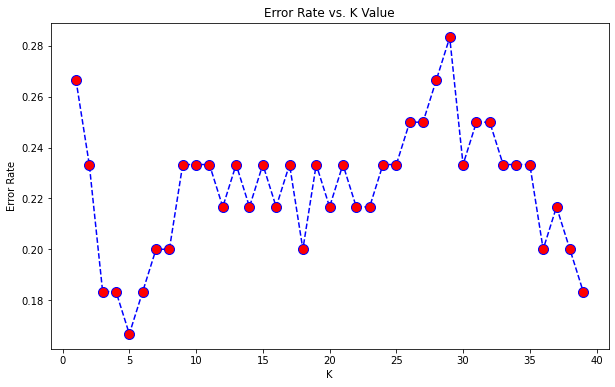

In [22]:

X = dataset [['creatinine_phosphokinase','time','platelets','ejection_fraction','age','serum_creatinine','high_blood_pressure']].values
y = dataset.iloc[:, -1].values
X= standardise(X)
k= hyper_tune(X,y)


result = calculate_model(k,X,y)
result

dict_knn['Chi'] = result

In [23]:
#del dict_knn['Chi']
dict_knn

{'Std_scalar': [73.97931034482758,
  74.44135107416903,
  67.846164021164,
  73.97931034482758,
  71.19334828711136,
  75.4014396411566,
  0.002238281567891439],
 'Optimal_k': [72.88467432950192,
  74.97114124376724,
  82.8157848324515,
  72.88467432950192,
  66.41798996673131,
  83.04581165765065,
  0.0025583585103352863],
 'SFS': [77.21455938697316,
  78.6648531063861,
  79.06459435626103,
  77.21455938697316,
  74.49233655494221,
  77.50745017536009,
  0.0014775180816650395],
 'SBS': [78.15593869731802,
  80.17526315027085,
  82.52656325156327,
  78.15593869731802,
  75.43245380133747,
  79.94592553958955,
  0.0021536684036254877],
 'MI': [75.84444444444443,
  76.85939268792104,
  72.81227753727754,
  75.84444444444443,
  73.41944022566011,
  80.31032430630698,
  0.002186671098073323],
 'Chi': [77.90536398467432,
  78.37789286836136,
  72.57254700032475,
  77.90536398467432,
  76.56666443540854,
  83.55306836364768,
  0.0022922817866007487]}

### EFS 

In [24]:
#pip install --upgrade pip mlxtend  

Features: 3000/4095IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



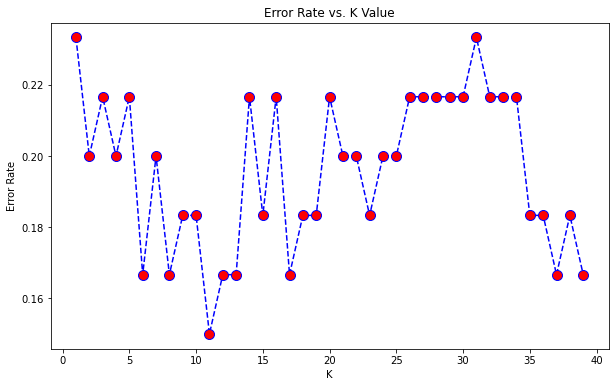

In [25]:
# Import logistic regression from Scikit-learn
# Import ExhaustiveFeatureSelector from Mlxtend
X = dataset.iloc[:, 0:-1].values
#X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1]
scaled_features = standardise(X)

knn = KNeighborsClassifier()

# Create an EFS object
efs = EFS(estimator=knn,        # Use logistic regression as the classifier/estimator
          min_features=1,      # The minimum number of features to consider is 1
          max_features=12,      # The maximum number of features to consider is 4
          scoring='accuracy',  # The metric to use to evaluate the classifier is accuracy 
          cv=5)                # The number of cross-validations to perform is 5

# Train EFS with our dataset
efs = efs.fit(scaled_features, y)

# Print the results
print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ shows the best score 
print('Best subset (indices):', efs.best_idx_)       # best_idx_ shows the index of features that yield the best score 
print('Best subset (corresponding names):', efs.best_feature_names_) # best_feature_names_ shows the feature names 

feat_cols = list( efs.best_idx_)
feat_cols
#X_train = X_train[:, feat_cols]

X = standardise(X)
#X_test = X_test[:, feat_cols]
X = X[:,feat_cols]
k= hyper_tune(X,y)

print(k)
result = calculate_model(k,X,y)
dict_knn['EFS'] = result

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### discritizer 

In [27]:
categorical_cols = ['anaemia','diabetes','high_blood_pressure','sex','smoking']
numerical_cols = ["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","platelets","serum_sodium","time"]
target_col = ["DEATH_EVENT"]

In [28]:
from sklearn.preprocessing import KBinsDiscretizer
#trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
#trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
data = trans.fit_transform(dataset[numerical_cols])
# convert the array back to a dataframe
num_cols = pd.DataFrame(data, dtype = 'int')
#num_cols = pd.DataFrame(data)
num_cols

0  1  2  3  4  5  6
0    1  0  0  0  0  1  0
1    0  2  1  0  0  1  0
2    1  0  0  0  0  1  0
3    0  0  0  0  0  2  0
4    1  0  0  0  1  0  0
..  .. .. .. .. .. .. ..
294  1  0  1  0  0  2  2
295  0  0  1  0  0  2  2
296  0  0  2  0  2  2  2
297  0  0  1  0  0  2  2
298  0  0  1  0  1  1  2

[299 rows x 7 columns]

In [29]:
num_cols.rename(columns = {0:'age', 1:'creatinine_phosphokinase',2:'ejection_fraction',3:'serum_creatinine',4:'platelets',5:'serum_sodium',6:'time'}, inplace = True)

In [30]:
num_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       299 non-null    int32
 1   creatinine_phosphokinase  299 non-null    int32
 2   ejection_fraction         299 non-null    int32
 3   serum_creatinine          299 non-null    int32
 4   platelets                 299 non-null    int32
 5   serum_sodium              299 non-null    int32
 6   time                      299 non-null    int32
dtypes: int32(7)
memory usage: 8.3 KB


In [31]:
df_add = dataset[categorical_cols].add(num_cols,fill_value=0)
df_add = pd.DataFrame(df_add, dtype = int)
df_add


age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0      1        0                         0         0                  0   
1      0        0                         2         0                  1   
2      1        0                         0         0                  0   
3      0        1                         0         0                  0   
4      1        1                         0         1                  0   
..   ...      ...                       ...       ...                ...   
294    1        0                         0         1                  1   
295    0        0                         0         0                  1   
296    0        0                         0         1                  2   
297    0        0                         0         0                  1   
298    0        0                         0         0                  1   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1          0                 0             1    1   
1                      0          0                 0             1    1   
2                      0          0                 0             1    1   
3                      0          0                 0             2    1   
4                      0          1                 0             0    0   
..                   ...        ...               ...           ...  ...   
294                    1          0                 0             2    1   
295                    0          0                 0             2    0   
296                    0          2                 0             2    0   
297                    0          0                 0             2    1   
298                    0          1                 0             1    1   

     smoking  time  
0          0     0  
1          0     0  
2          1     0  
3          0     0  
4          0     0  
..       ...   ...  
294        1     2  
295        0     2  
296        0     2  
297        1     2  
298        1     2  

[299 rows x 12 columns]

oldpeak     1.037818e-22
caa         1.341127e-11
cp          8.125199e-11
exng        1.022439e-05
thalachh    2.277983e-05
slp         9.434124e-03
age         1.340074e-02
thall       1.798765e-02
sex         2.788623e-02
trtbps      1.630069e-01
fbs         1.672147e-01
restecg     3.242724e-01
chol        6.151344e-01

Minimum error:- 0.18333333333333332 at K = 22


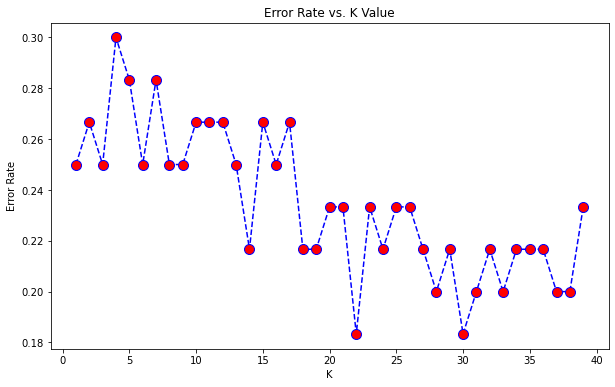

In [32]:
X = df_add.iloc[::].values
y = dataset.iloc[:, -1].values

 
k= hyper_tune(X,y)
X = standardise(X)
result = calculate_model(k,X,y)
result
dict_knn['Disc'] = result

In [33]:
dict_knn

{'Std_scalar': [73.97931034482758,
  74.44135107416903,
  67.846164021164,
  73.97931034482758,
  71.19334828711136,
  75.4014396411566,
  0.002238281567891439],
 'Optimal_k': [72.88467432950192,
  74.97114124376724,
  82.8157848324515,
  72.88467432950192,
  66.41798996673131,
  83.04581165765065,
  0.0025583585103352863],
 'SFS': [77.21455938697316,
  78.6648531063861,
  79.06459435626103,
  77.21455938697316,
  74.49233655494221,
  77.50745017536009,
  0.0014775180816650395],
 'SBS': [78.15593869731802,
  80.17526315027085,
  82.52656325156327,
  78.15593869731802,
  75.43245380133747,
  79.94592553958955,
  0.0021536684036254877],
 'MI': [75.84444444444443,
  76.85939268792104,
  72.81227753727754,
  75.84444444444443,
  73.41944022566011,
  80.31032430630698,
  0.002186671098073323],
 'Chi': [77.90536398467432,
  78.37789286836136,
  72.57254700032475,
  77.90536398467432,
  76.56666443540854,
  83.55306836364768,
  0.0022922817866007487],
 'EFS': [77.27969348659005,
  79.19593963

## Discritization(uniform) + Chi


In [34]:
X = df_add
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)

f_p_values=chi2(X_train,y_train)
f_p_values
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X.columns
p_values

p_values.sort_values(ascending=True)

time                        8.916978e-10
age                         1.526006e-03
serum_creatinine            3.004737e-03
creatinine_phosphokinase    1.585020e-02
ejection_fraction           1.658507e-02
serum_sodium                2.094566e-01
high_blood_pressure         2.688559e-01
anaemia                     5.603832e-01
platelets                   6.166522e-01
smoking                     9.571707e-01
diabetes                    9.614165e-01
sex                         9.698977e-01
dtype: float64

Minimum error:- 0.1 at K = 8


[78.89540229885057,
 80.46844759922924,
 83.03230452674897,
 78.89540229885057,
 76.3197404820339,
 78.54695324068568,
 0.001513615449269612]

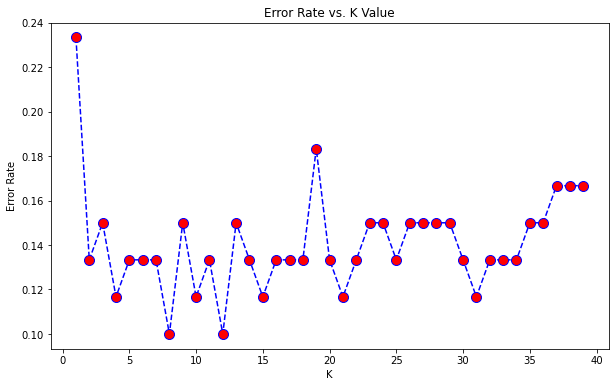

In [35]:

X = dataset [['creatinine_phosphokinase','time','ejection_fraction','age','serum_creatinine','serum_sodium']].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=101
                                                   )
k= hyper_tune(X,y)
#X = standardise(X)
result = calculate_model(k,X,y)
dict_knn['Disc_Uniform+Chi'] = result
result

In [36]:
dict_knn

{'Std_scalar': [73.97931034482758,
  74.44135107416903,
  67.846164021164,
  73.97931034482758,
  71.19334828711136,
  75.4014396411566,
  0.002238281567891439],
 'Optimal_k': [72.88467432950192,
  74.97114124376724,
  82.8157848324515,
  72.88467432950192,
  66.41798996673131,
  83.04581165765065,
  0.0025583585103352863],
 'SFS': [77.21455938697316,
  78.6648531063861,
  79.06459435626103,
  77.21455938697316,
  74.49233655494221,
  77.50745017536009,
  0.0014775180816650395],
 'SBS': [78.15593869731802,
  80.17526315027085,
  82.52656325156327,
  78.15593869731802,
  75.43245380133747,
  79.94592553958955,
  0.0021536684036254877],
 'MI': [75.84444444444443,
  76.85939268792104,
  72.81227753727754,
  75.84444444444443,
  73.41944022566011,
  80.31032430630698,
  0.002186671098073323],
 'Chi': [77.90536398467432,
  78.37789286836136,
  72.57254700032475,
  77.90536398467432,
  76.56666443540854,
  83.55306836364768,
  0.0022922817866007487],
 'EFS': [77.27969348659005,
  79.19593963

## Discetization(k-mean) + chi

In [37]:
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
#trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
#trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
data = trans.fit_transform(dataset[numerical_cols])
num_cols = pd.DataFrame(data, dtype = 'int')
num_cols.rename(columns = {0:'age', 1:'creatinine_phosphokinase',2:'ejection_fraction',3:'serum_creatinine',4:'platelets',5:'serum_sodium',6:'time'}, inplace = True)
df_add = dataset[categorical_cols].add(num_cols,fill_value=0)
df_add = pd.DataFrame(df_add, dtype = int)
X = df_add
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)

f_p_values=chi2(X_train,y_train)
f_p_values
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X.columns
p_values

p_values.sort_values(ascending=True)
 

time                        1.913174e-28
serum_creatinine            3.098504e-09
age                         7.987273e-08
ejection_fraction           4.601630e-06
creatinine_phosphokinase    5.394379e-03
high_blood_pressure         2.688559e-01
serum_sodium                4.372052e-01
anaemia                     5.603832e-01
smoking                     9.571707e-01
diabetes                    9.614165e-01
sex                         9.698977e-01
platelets                   9.911764e-01
dtype: float64

Minimum error:- 0.1 at K = 8


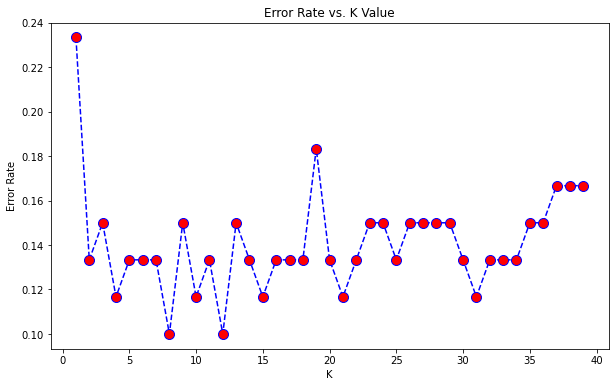

In [38]:
X = dataset [['creatinine_phosphokinase','time','high_blood_pressure','ejection_fraction','age','serum_creatinine','serum_sodium','anaemia']].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=101
                                                   )
k= hyper_tune(X,y)

result = calculate_model(k,X,y)
result
dict_knn['Disc_Kmeans+Chi'] = result

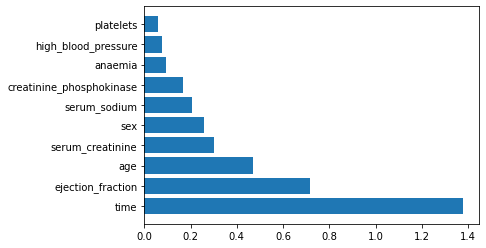

In [39]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()
    
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)

features_names = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine',
      'serum_sodium','sex','smoking', 'time']
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)
f_importances(abs(svm.coef_[0]), features_names, top=10)


Minimum error:- 0.13333333333333333 at K = 7


[81.64329501915707,
 82.3598894641206,
 74.33249343249346,
 81.64329501915707,
 81.26753103857723,
 87.99703315303086,
 0.0018218485514322925]

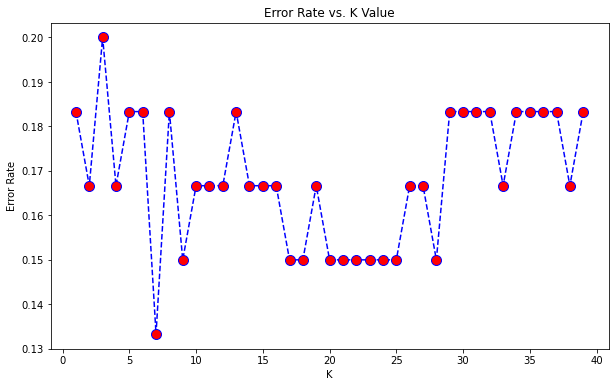

In [40]:
X = dataset[['time', 'serum_creatinine','ejection_fraction','age']].values

y = dataset.iloc[:, -1].values
scaled_features = standardise(X)
X=scaled_features
k= hyper_tune(X,y)
result = calculate_model(k,X,y)

dict_knn['SVM_coeffients'] = result
result

In [41]:
 #del dict_knn['Disc_K+Chi']
dict_knn
df_dict = pd.DataFrame.from_dict(dict_knn,orient='index', columns= ['Accuracy','Precision','Specificity','Recall','F1_score','Roc','CPU_time'])
df_dict

Accuracy  Precision  Specificity     Recall   F1_score  \
Std_scalar        73.979310  74.441351    67.846164  73.979310  71.193348   
Optimal_k         72.884674  74.971141    82.815785  72.884674  66.417990   
SFS               77.214559  78.664853    79.064594  77.214559  74.492337   
SBS               78.155939  80.175263    82.526563  78.155939  75.432454   
MI                75.844444  76.859393    72.812278  75.844444  73.419440   
Chi               77.905364  78.377893    72.572547  77.905364  76.566664   
EFS               77.279693  79.195940    81.678439  77.279693  74.180765   
Disc              69.956322  68.334715    68.483620  69.956322  62.068227   
Disc_Uniform+Chi  78.895402  80.468448    83.032305  78.895402  76.319740   
Disc_Kmeans+Chi   78.828352  80.472167    83.412366  78.828352  76.339561   
SVM_coeffients    81.643295  82.359889    74.332493  81.643295  81.267531   

                        Roc  CPU_time  
Std_scalar        75.401440  0.002238  
Optimal_k         83.045812  0.002558  
SFS               77.507450  0.001478  
SBS               79.945926  0.002154  
MI                80.310324  0.002187  
Chi               83.553068  0.002292  
EFS               83.539784  0.002259  
Disc              77.140499  0.002365  
Disc_Uniform+Chi  78.546953  0.001514  
Disc_Kmeans+Chi   79.194174  0.002362  
SVM_coeffients    87.997033  0.001822

In [42]:

#df_dict.to_excel('xl_result/knn_heart2_30.xlsx')

In [2]:
#df_dict =  pd.read_excel('xl_result/knn_heart2_30.xlsx',index_col=0)

In [3]:
# Adding Number of features
df_dict['no_of_features'] = [12,12,5,8,9,9,12,6,8,4]
df_dict

Accuracy  Precision  Specificity     Recall   F1_score  \
Std_scalar        73.979310  74.441351    67.846164  73.979310  71.193348   
Optimal_k         72.884674  74.971141    82.815785  72.884674  66.417990   
SFS               77.214559  78.664853    79.064594  77.214559  74.492337   
SBS               78.155939  80.175263    82.526563  78.155939  75.432454   
MI                75.844444  76.859393    72.812278  75.844444  73.419440   
EFS               77.279693  79.195940    81.678439  77.279693  74.180765   
Disc              69.956322  68.334715    68.483620  69.956322  62.068227   
Disc_Uniform+Chi  78.895402  80.468448    83.032305  78.895402  76.319740   
Disc_Kmeans+Chi   78.828352  80.472167    83.412366  78.828352  76.339561   
SVM_coeffients    81.643295  82.359889    74.332493  81.643295  81.267531   

                        Roc  CPU_time  no_of_features  
Std_scalar        75.401440  0.002238              12  
Optimal_k         83.045812  0.002558              12  
SFS               77.507450  0.001478               5  
SBS               79.945926  0.002154               8  
MI                80.310324  0.002187               9  
EFS               83.539784  0.002259               9  
Disc              77.140499  0.002365              12  
Disc_Uniform+Chi  78.546953  0.001514               6  
Disc_Kmeans+Chi   79.194174  0.002362               8  
SVM_coeffients    87.997033  0.001822               4